<a href="https://colab.research.google.com/github/kholishotul62/mental-health-in-tech/blob/main/Project_Akhir_IBM_Kholishotul_Mu'diyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install replicate -q
!pip install langchain_community -q
!pip install opendatasets seaborn scikit-learn -q
!pip install pandas -q
!pip install -U langchain langchain-community langchain-experimental replicate -q

In [40]:
from google.colab import userdata
import os

# ambil token dari secret
api_token = userdata.get("api_token")

# lempar token ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [41]:
from langchain_community.llms import Replicate

# Define parameters for the model (add your desired parameters here)
parameters = {}

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters
)

In [42]:
import pandas as pd

df = pd.read_csv("/content/mental-health-in-tech-survey/survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [43]:
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Download dataset Mental Health in Tech Industry dari Kaggle
od.download("https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey")

# Load dataset
data_path = "./mental-health-in-tech-survey/survey.csv"
df = pd.read_csv(data_path)

# Pilih subset kolom penting
cols = ["Age", "Gender", "family_history", "remote_work", "work_interfere", "treatment"]
df_model = df[cols].dropna()

# Encode kolom kategorikal
le = LabelEncoder()
for col in cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

X = df_model.drop("treatment", axis=1)
y = df_model["treatment"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Skipping, found downloaded files in "./mental-health-in-tech-survey" (use force=True to force download)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        65
           1       0.81      0.80      0.80       134

    accuracy                           0.74       199
   macro avg       0.70      0.71      0.71       199
weighted avg       0.74      0.74      0.74       199



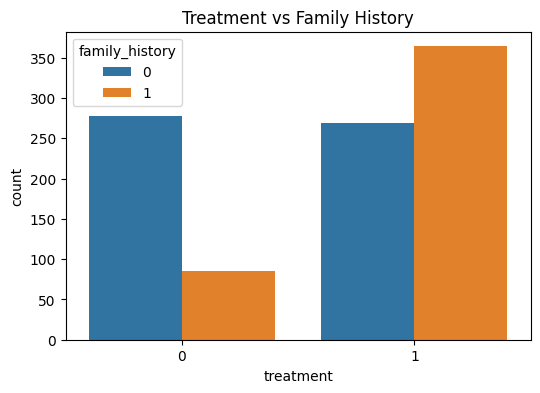

/tmp/ipython-input-1569785235.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="treatment", y="Age", data=df_model, palette="Set2")


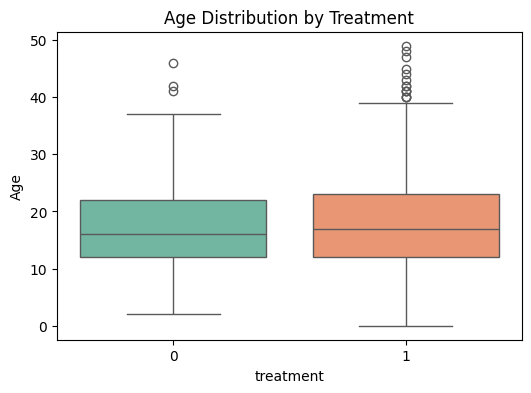

In [44]:
# Train RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Visualisasi hubungan Treatment vs Family History
plt.figure(figsize=(6,4))
sns.countplot(x="treatment", hue="family_history", data=df_model)
plt.title("Treatment vs Family History")
plt.show()

# Visualisasi distribusi Age berdasarkan Treatment
plt.figure(figsize=(6,4))
sns.boxplot(x="treatment", y="Age", data=df_model, palette="Set2")
plt.title("Age Distribution by Treatment")
plt.show()


In [45]:
# Load dataset
data_path = "./mental-health-in-tech-survey/survey.csv"
df = pd.read_csv(data_path)

# Pilih kolom yang relevan
cols = ["Age", "Gender", "family_history", "remote_work", "work_interfere", "treatment"]
df_model = df[cols].dropna()

# Encode kategori
le = LabelEncoder()
for col in cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

X = df_model.drop("treatment", axis=1)
y = df_model["treatment"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        65
           1       0.81      0.80      0.80       134

    accuracy                           0.74       199
   macro avg       0.70      0.71      0.71       199
weighted avg       0.74      0.74      0.74       199



In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # input = jumlah fitur
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # output biner: treatment yes/no
])

# Compile model
keras_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Ringkasan model
keras_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5626 - loss: 1.4457 - val_accuracy: 0.4625 - val_loss: 0.7528
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5165 - loss: 1.2930 - val_accuracy: 0.5875 - val_loss: 0.6842
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5513 - loss: 1.0128 - val_accuracy: 0.6500 - val_loss: 0.6313
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5905 - loss: 0.8441 - val_accuracy: 0.6500 - val_loss: 0.6313
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5597 - loss: 0.7834 - val_accuracy: 0.6438 - val_loss: 0.6372
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5727 - loss: 0.7857 - val_accuracy: 0.6750 - val_loss: 0.6265
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6007 - loss: 0.7423 - val_accuracy: 0.6687 - val_loss: 0.6291
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5741 - loss: 0.7016 - val_accuracy: 0.6562 - val_l

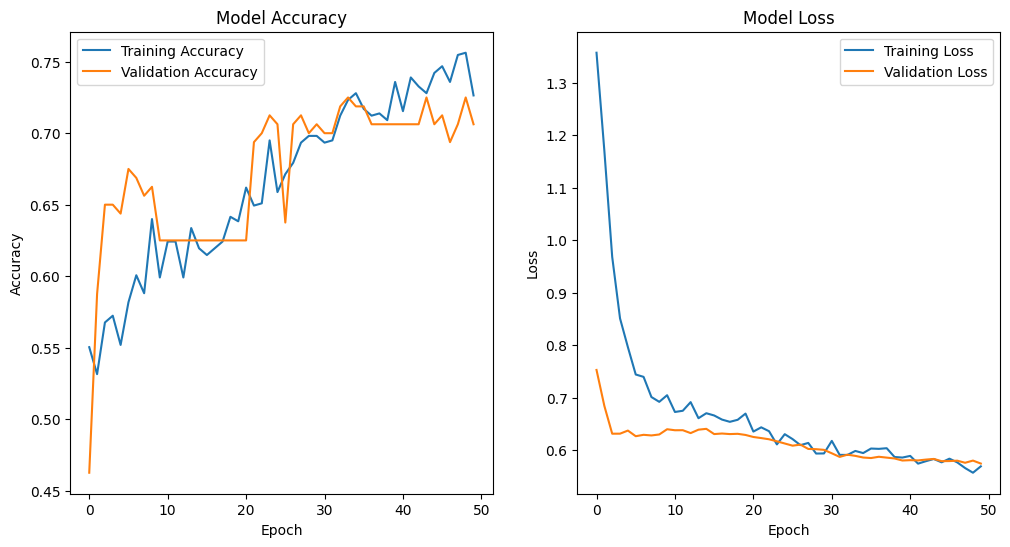

In [47]:
# Train model
history = keras_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = keras_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

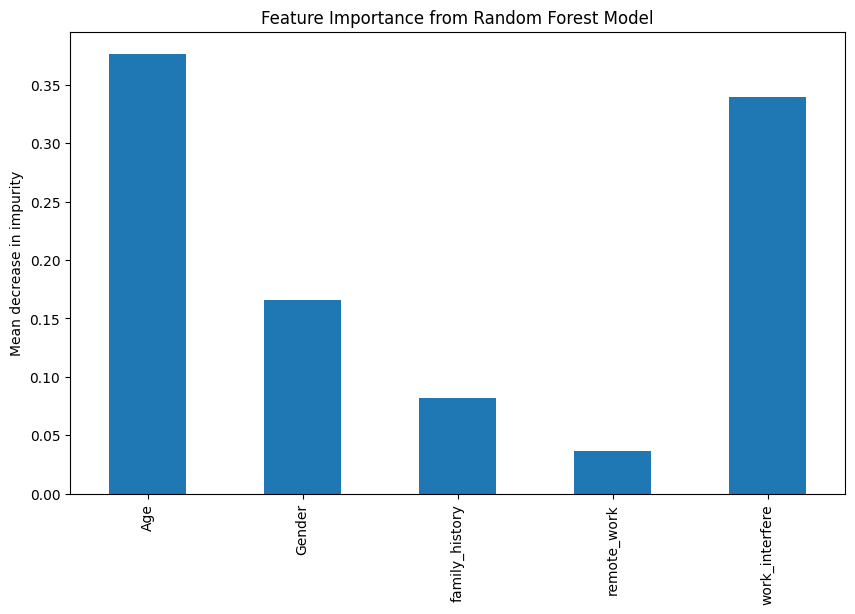

In [48]:
# Visualize feature importance from the Random Forest model
# Use the Random Forest model (assuming it's still in a variable named 'model_rf' or similar from a previous cell)
# If not, you might need to re-run the Random Forest training cell or load the model.

# Assuming the Random Forest model is in a variable named 'rf_model'
# If your Random Forest model variable has a different name, please change 'rf_model' to that name.
importances = rf_model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importance from Random Forest Model")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

In [50]:
llm_another = Replicate(
    model="meta/llama-2-70b-chat",
    input={"temperature": 0.75, "max_length": 3000} # Example parameters, adjust as needed
)

In [56]:
# Mengambil nama-nama kolom dari dataframe
column_names = df.columns.tolist()

# Membuat prompt untuk LLM
prompt = f"""
Berikut adalah nama-nama kolom dari dataset survei kesehatan mental di industri teknologi:
{', '.join(column_names)}

Berdasarkan nama-nama kolom ini, berikan 15 wawasan atau pertanyaan menarik
yang bisa dieksplorasi dari dataset ini terkait kesehatan mental di industri teknologi.
Jangan memberikan jawaban yang sudah ada di dataset, fokus pada potensi analisis dan pertanyaan yang bisa dijawab.
"""

# Menggunakan LLM untuk mendapatkan wawasan
try:
    response = llm_another.invoke(prompt)
    print("Wawasan dari LLM:")
    print(response)
except Exception as e:
    print(f"Terjadi error saat memanggil LLM: {e}")

Wawasan dari LLM:
 Sure, here are 15 interesting insights or questions that can be explored from the dataset related to mental health in the tech industry:

1. What is the distribution of mental health issues among tech industry employees?
2. Is there a correlation between work interference and mental health issues?
3. How does the availability of mental health benefits and wellness programs impact employee mental health?
4. Are there any differences in mental health outcomes between self-employed and employed individuals in the tech industry?
5. Is there a relationship between family history of mental health issues and an individual's likelihood of experiencing mental health problems?
6. What is the impact of remote work on mental health in the tech industry?
7. Are there any differences in mental health outcomes between employees in different countries or regions?
8. How does the size of a company impact mental health outcomes for employees?
9. Are there any differences in mental hea